In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "C:\\Users\\SHAARIF ANAS\\Downloads\\m1_survey_data.csv"
df = pd.read_csv(file_path)
df.head(5)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11552 entries, 0 to 11551
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11552 non-null  int64  
 1   MainBranch              11552 non-null  object 
 2   Hobbyist                11552 non-null  object 
 3   OpenSourcer             11552 non-null  object 
 4   OpenSource              11471 non-null  object 
 5   Employment              11552 non-null  object 
 6   Country                 11552 non-null  object 
 7   Student                 11499 non-null  object 
 8   EdLevel                 11436 non-null  object 
 9   UndergradMajor          10812 non-null  object 
 10  EduOther                11388 non-null  object 
 11  OrgSize                 11454 non-null  object 
 12  DevType                 11485 non-null  object 
 13  YearsCode               11543 non-null  object 
 14  Age1stCode              11539 non-null

### Distribution

<Axes: xlabel='ConvertedComp', ylabel='Count'>

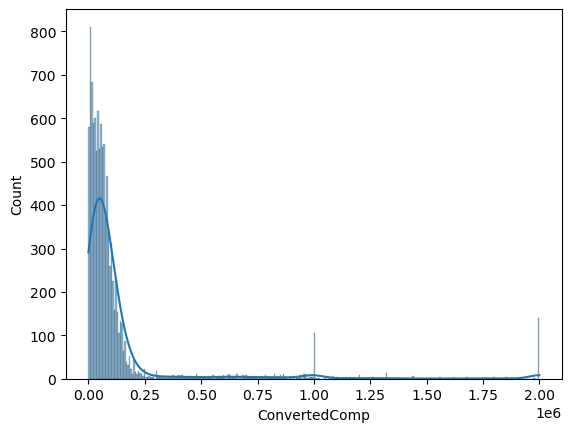

In [4]:
sns.histplot(df['ConvertedComp'],kde=True)

<Axes: xlabel='ConvertedComp', ylabel='Count'>

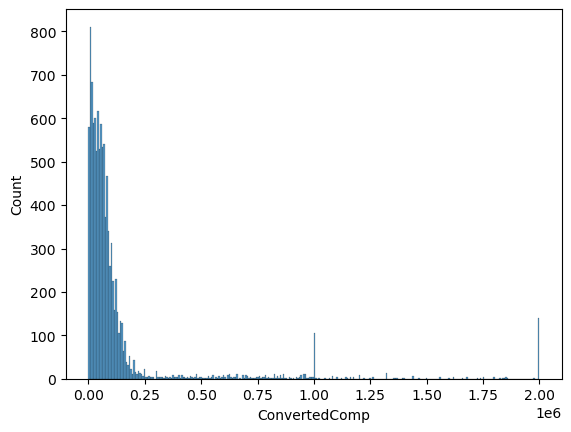

In [5]:
sns.histplot(df['ConvertedComp'])

In [7]:
df['Age'].median()

29.0

In [8]:
df['ConvertedComp'].median()

57744.0

In [9]:
df['Gender'].value_counts()

Man                                                            10626
Woman                                                            737
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

In [10]:
df.loc[df['Gender']=='Woman', 'ConvertedComp'].median()

57636.0

In [11]:
df['Age'].describe()

count    11255.000000
mean        30.772394
std          7.392780
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

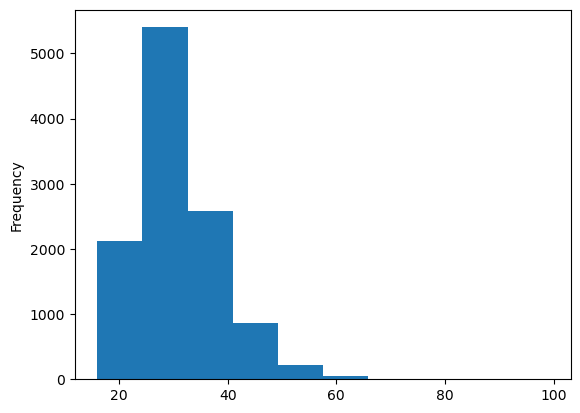

In [12]:
df['Age'].plot(kind = 'hist', bins = 10)

### Outliers

<Axes: >

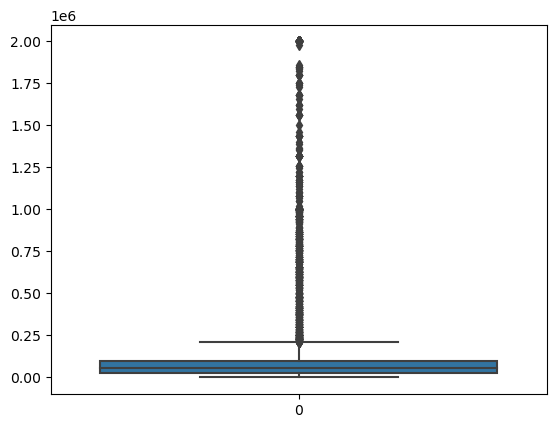

In [13]:
sns.boxplot(df['ConvertedComp'])

<Axes: >

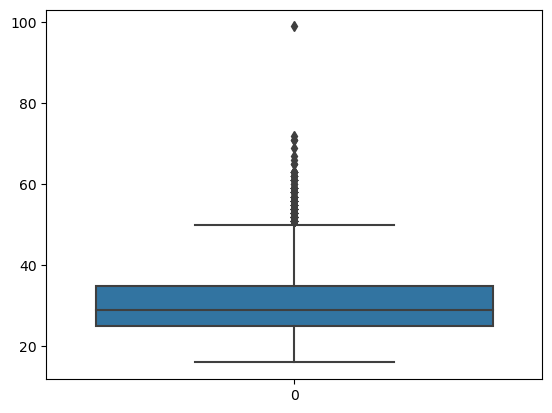

In [14]:
sns.boxplot(df['Age'])

In [15]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1
print(IQR)

73273.0


In [16]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [17]:
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

In [18]:
df_new = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
df_new['ConvertedComp'].median()

52704.0

In [19]:
df_new['ConvertedComp'].mean()

59878.65515139199

### Correlation

In [20]:
df.corr()

C:\Users\SHAARIF ANAS\AppData\Local\Temp\ipykernel_26688\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.012384,0.003173,-0.014384,0.009764,0.005103
CompTotal,-0.012384,1.000000,0.001003,0.003533,0.007320,0.007036
ConvertedComp,0.003173,0.001003,1.000000,0.020885,-0.034383,0.103652
WorkWeekHrs,-0.014384,0.003533,0.020885,1.000000,0.026910,0.036887
CodeRevHrs,0.009764,0.007320,-0.034383,0.026910,1.000000,-0.018505
Age,0.005103,0.007036,0.103652,0.036887,-0.018505,1.000000
